## Working withGgeohash in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/10_geohash.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/10_geohash.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/10_geohash.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/10_geohash.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2geohash

In [2]:
from vgrid.conversion.latlon2dggs import latlon2geohash

lat = 10.775276
lon = 106.706797
res = 6
geohash_id = latlon2geohash(lat, lon, res)
geohash_id

'w3gvk1'

### Geohash to Shapely Polygon

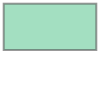

In [3]:
from vgrid.conversion.dggs2geo.geohash2geo  import geohash2geo

geohash_geo = geohash2geo(geohash_id)
geohash_geo

### Geohash to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.geohash2geo import geohash2geojson

geohash_geojson = geohash2geojson(geohash_id)
geohash_geojson

{'type': 'FeatureCollection', 'features': []}

### Vector to Geohash

Processing features: 100%|██████████| 4/4 [00:00<00:00, 102.97it/s]


<Axes: >

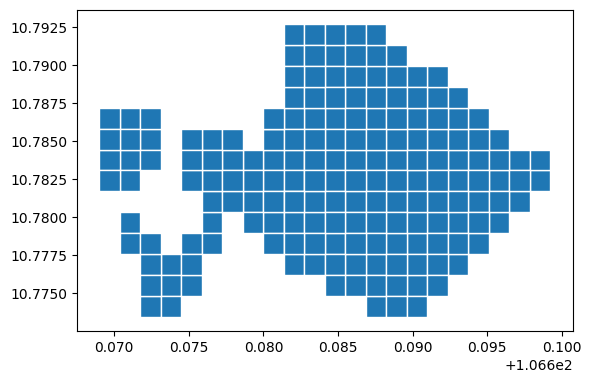

In [5]:
from vgrid.conversion.vector2dggs.vector2geohash import vector2geohash

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon.geojson"
)
vector_to_geohash = vector2geohash(file_path, resolution=7, compact=False, 
                                    predicate = "intersects",output_format="gpd")
# Visualize the output
vector_to_geohash.plot(edgecolor="white")

### Geohash Compact

<Axes: >

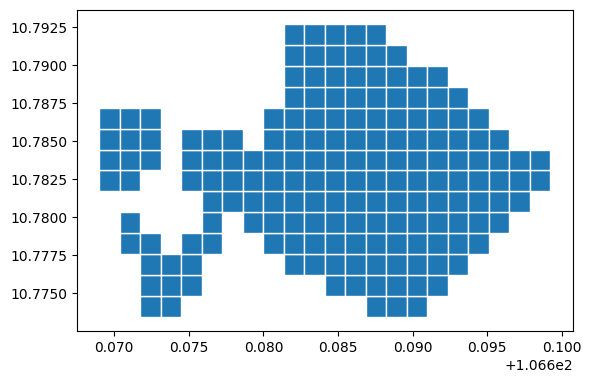

In [6]:
from vgrid.conversion.dggscompact.geohashcompact import geohashcompact

geohash_compacted = geohashcompact(vector_to_geohash, geohash_id="geohash", output_format="gpd")
geohash_compacted.plot(edgecolor="white")



### Geohash Expand

<Axes: >

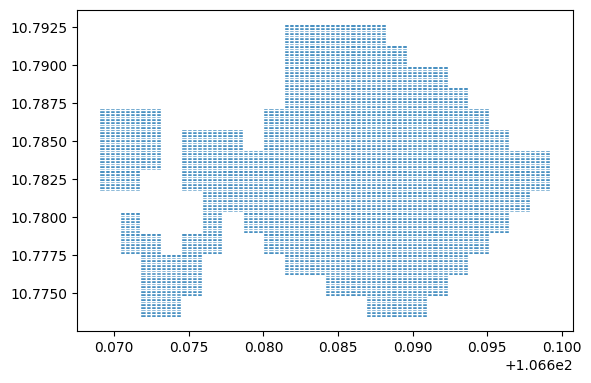

In [7]:
from vgrid.conversion.dggscompact.geohashcompact import geohashexpand

geohash_expanded = geohashexpand(
    vector_to_geohash, resolution=8, output_format="gpd"        
)
geohash_expanded.plot(edgecolor="white")

### Geohash Binning

Generating Geohash DGGS: 100%|██████████| 744/744 [00:00<00:00, 8853.06 cells/s]


<Axes: >

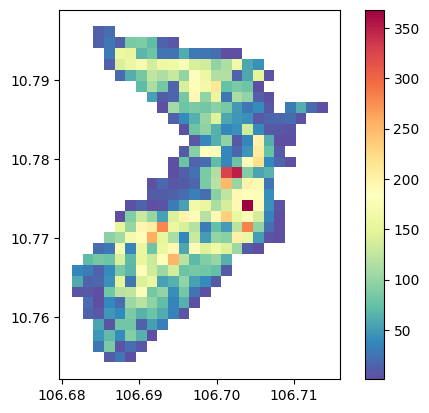

In [3]:
from vgrid.binning.geohashbin import geohashbin
import geopandas as gpd
file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
geohash_bin =  geohashbin(file_path, resolution=7, stats=stats, 
                # numeric_field="confidence",
                # category="category",
                output_format="gpd")
geohash_bin.plot(
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)   

### Raster to Geohash

In [9]:
# %pip install folium

In [10]:
from vgrid.conversion.raster2dggs.raster2geohash    import raster2geohash
from vgrid.utils.io import download_file          

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)

raster_to_geohash =  raster2geohash(raster_file,output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

geohash_layer = folium.GeoJson(
    raster_to_geohash,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["geohash", "band_1", "band_2", "band_3"],
        aliases=["Geohash ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(geohash_layer.get_bounds())

# Display the map
m

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db
WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
Nearest geohash resolution determined: 10


Converting to GeoDataFrame: 100%|██████████| 4307/4307 [00:00<00:00, 53947.20 cells/s]


### Geohash Generator

Generating Geohash DGGS: 100%|██████████| 180/180 [00:00<00:00, 6075.67 cells/s]


<Axes: >

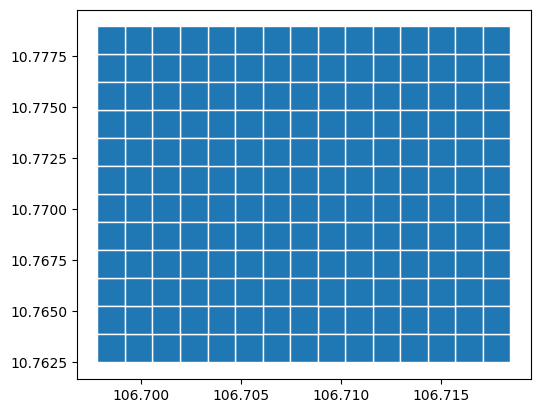

In [11]:
from vgrid.generator.geohashgrid import geohashgrid
# geohash_grid = geohashgrid(resolution=1,output_format="gpd")
geohash_grid = geohashgrid(resolution=7,bbox=[106.699007, 10.762811, 106.717674, 10.778649],
                            output_format="gpd")
geohash_grid.plot(edgecolor="white")

### Geohash Inspect

In [1]:
from vgrid.stats.geohashstats import geohashinspect 
resolution = 3
geohash_inspect = geohashinspect(resolution)    
geohash_inspect.head()

Generating Geohash DGGS: 100%|██████████| 32768/32768 [00:02<00:00, 12238.34 cells/s]


geohash  resolution  center_lat  center_lon  cell_width  cell_height  \
0     445           3  -78.046875  -85.078125   30638.101   157001.499   
1     uqb           3   83.671875   11.953125   19225.557   157050.292   
2     nxd           3  -47.109375  116.015625  105320.146   156336.991   
3     vut           3   71.015625   86.484375   52893.772   156901.708   
4     c7m           3   63.984375 -116.015625   70570.828   156764.626   

      cell_area  cell_perimeter  \
0  5.106049e+09      379048.869   
1  2.718492e+09      348720.779   
2  1.668573e+10      526125.489   
3  8.013363e+09      415949.629   
4  1.079198e+10      451213.306   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-85.78125 -78.75, -84.375 -78.75, -8...    False   0.328026   
1  POLYGON ((11.25 82.96875, 12.65625 82.96875, 1...    False   0.174643   
2  POLYGON ((115.3125 -47.8125, 116.71875 -47.812...    False   1.071937   
3  POLYGON ((85.78125 70.3125, 87.1875 70.3125, 8...    False   0.514800   
4  POLYGON ((-116.71875 63.28125, -115.3125 63.28...    False   0.693306   

        ipq       zsc  
0  0.446585  0.668267  
1  0.280920  0.530017  
2  0.757489  0.870324  
3  0.582027  0.762901  
4  0.666112  0.816148

### Distribution of Geohash Area Distortions

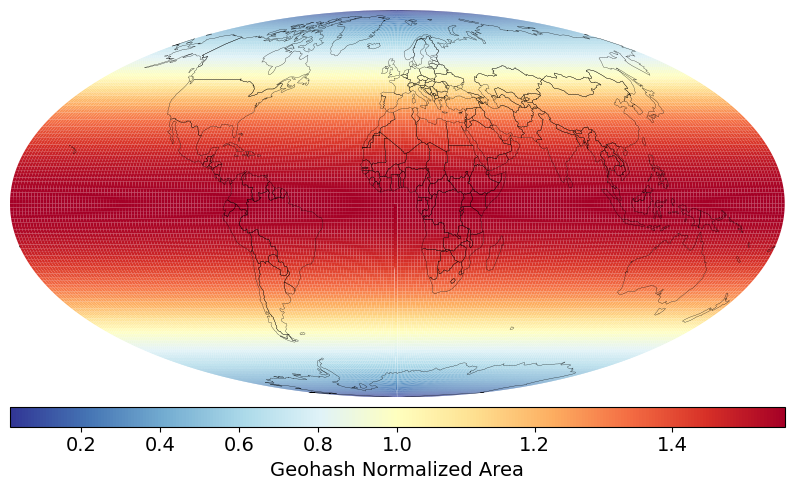

In [2]:
from vgrid.stats.geohashstats import geohash_norm_area
geohash_norm_area(geohash_inspect)

### Distribution of Geohash IPQ Compactness

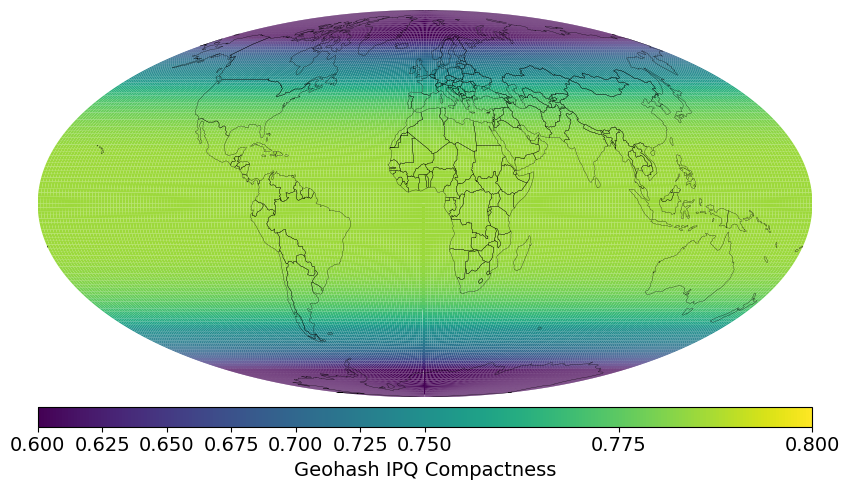

In [3]:
from vgrid.stats.geohashstats import geohash_compactness
geohash_compactness(geohash_inspect)

### Geohash Statistics

In [1]:
from vgrid.stats import geohashstats            
geohashstats()

resolution      number_of_cells  avg_edge_len_m  avg_cell_area_m2
0            1                   32    3.992437e+06      1.593955e+13
1            2                 1024    7.057698e+05      4.981110e+11
2            3                32768    1.247636e+05      1.556597e+10
3            4              1048576    2.205531e+04      4.864365e+08
4            5             33554432    3.898864e+03      1.520114e+07
5            6           1073741824    6.892283e+02      4.750356e+05
6            7          34359738368    1.218395e+02      1.484486e+04
7            8        1099511627776    2.153838e+01      4.639020e+02
8            9       35184372088832    3.807484e+00      1.449694e+01
9           10     1125899906842624    6.730745e-01      4.530293e-01
10          11    36028797018963968    1.189839e-01      1.415717e-02
11          12  1152921504606846976    2.103358e-02      4.424114e-04